In [36]:
import numpy as np
import matplotlib.pyplot as plt

import py.continuum1d as continuum1d

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, violationType, a_jkValues, lmbd
from py.turings import checkStability

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
params=None
c1d = continuum1d.continuum1d()

1d Model initialised.


In [158]:
ee = 0.85
ii = 0.27

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 8*1000, 'mu_a': 0.4, 'beta_a': 10}

ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)

k=np.linspace(-3,3,51)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)
#vio, k0 = 
print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

#fpa = F_a(fps[0][0], ps)
#fpa
#violationType(k, a_ee, a_ei, a_ie, a_ii, ps)

fixed points [[0.11764133 0.62131853]
 [0.6610546  0.99957344]
 [0.99743213 0.99999834]] 
with (mass) stability [1, 0, 1]


In [159]:
fp = fps[0]
checkStability(k, fp, ps)

(1, 1, 0)

In [160]:
ue, ui = c1d.run(ps, itype='inte_fft', fp=fp)

In [161]:
ueff, uiff = c1d.run(ps, itype='inte_adaptation', fp=fp)

Text(0.5, 0, 'time')

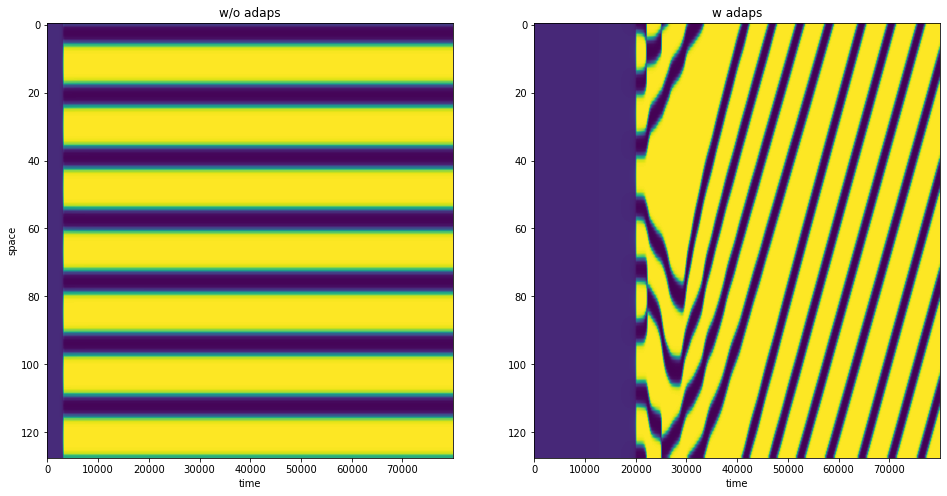

In [163]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue.T[:,-80000:], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff.T[:,-80000:], vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='w/o adaps')
ax1.set_title(label='w adaps')


ax0.set_xlabel('time')
ax0.set_ylabel('space')

ax1.set_xlabel('time')

In [125]:
ue

array([[0.00732912, 0.00974622, 0.00384571, ..., 0.0031515 , 0.00147058,
        0.00315219],
       [0.03268598, 0.03485848, 0.0294655 , ..., 0.02873687, 0.02727091,
        0.0288643 ],
       [0.06359811, 0.06554263, 0.06058905, ..., 0.05985082, 0.0585784 ,
        0.0600958 ],
       ...,
       [0.89394381, 0.89394381, 0.89394381, ..., 0.89394381, 0.89394381,
        0.89394381],
       [0.88976235, 0.88976235, 0.88976235, ..., 0.88976235, 0.88976235,
        0.88976235],
       [0.88378026, 0.88378026, 0.88378026, ..., 0.88378026, 0.88378026,
        0.88378026]])

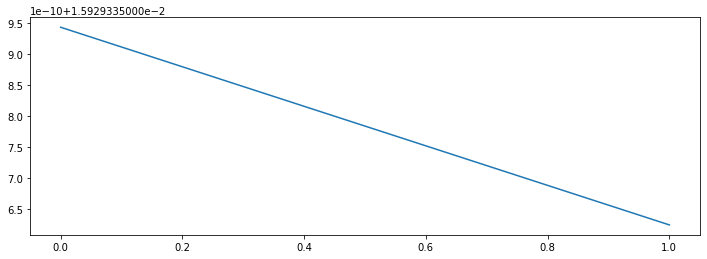

In [126]:
plt.figure(figsize=(12,4))
        
plt.plot(np.linspace(0,1,10000), ueff.T[60,-10000:])#, vmin=0, vmax=1, aspect='auto')
plt.show()

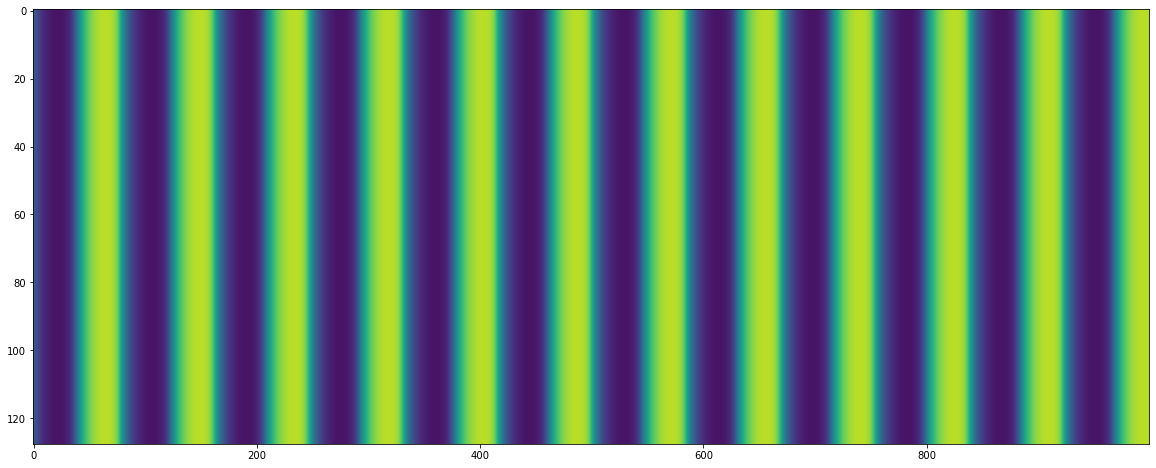

In [127]:
plt.figure(figsize=(20,8))

plt.imshow(ue.T[:,-1000:], vmin=0, vmax=1, aspect='auto')

In [57]:
ueff.T[:, 15000:18000]

array([[0.06648081, 0.06586598, 0.06525774, ..., 0.70872862, 0.71093921,
        0.7131389 ],
       [0.30662265, 0.3041452 , 0.3016819 , ..., 0.25920138, 0.26121915,
        0.26324781],
       [0.76180959, 0.75968422, 0.75754633, ..., 0.05686311, 0.05733417,
        0.05780953],
       ...,
       [0.00419745, 0.0041909 , 0.0041844 , ..., 0.99446145, 0.99448156,
        0.99450149],
       [0.00663908, 0.00661221, 0.00658559, ..., 0.9856189 , 0.98571631,
        0.98581281],
       [0.01668067, 0.01656418, 0.01644887, ..., 0.93905334, 0.93959202,
        0.94012552]])

In [58]:
from py.explo import collectPatterns

p = collectPatterns(fp, ps, last_sec=100)
print(p)
p2 = collectPatterns(np.array([0.0, 0.01]), ps, last_sec=100)
p2


KeyboardInterrupt: 

In [15]:
from py.funcs import getAvgPSD

start = 1*10000
end = ps.end_t*10
time = ps.time[start:end]

freqs_space, avg_space = getAvgPSD(ueff.T[:,int(start):int(end)], ps.n)
freqs_time, avg_time = getAvgPSD(ueff[int(start):int(end),:], 10000)

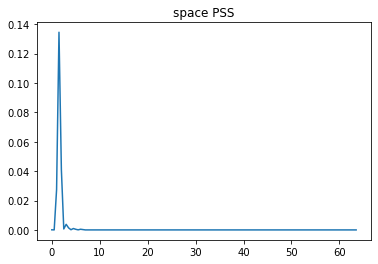

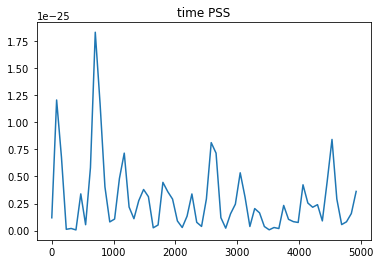

In [16]:
plt.plot(freqs_space, avg_space)
plt.title('space PSS')
plt.show()
plt.plot(freqs_time, avg_time)
plt.title('time PSS')
plt.show()

In [17]:
max_space_freq = freqs_space[np.argmax(avg_space)]
max_time_freq = freqs_time[np.argmax(avg_time)]

print('max space freq: %.2f, max time freq: %.2f' %(max_space_freq, max_time_freq))
np.max(avg_time)

max space freq: 1.50, max time freq: 703.12


1.8335952430084347e-25

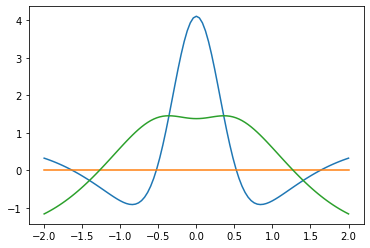

In [52]:
from py.analysis import det, tr

k=np.linspace(-2,2,101)

determ = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
plt.plot(k, determ, k, np.zeros(len(k)))
plt.plot(k, trace)


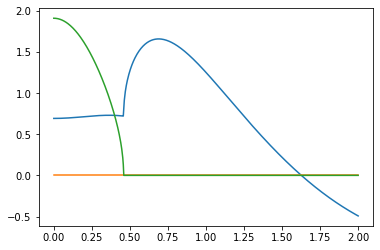

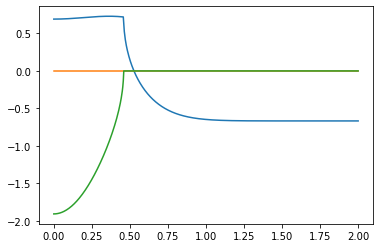

In [27]:
k=np.linspace(0,2,601)

eigval = lmbd(k, a_ee, a_ei, a_ie, a_ii, ps)


lmbd1 = eigval[0]
plt.plot(k, lmbd1.real, k, np.zeros(len(k)))
plt.plot(k, lmbd1.imag)
plt.show()


lmbd2 = eigval[1]
plt.plot(k, lmbd2.real, k, np.zeros(len(k)))
plt.plot(k, lmbd2.imag)

In [28]:
plt.figure(figsize=(16,8))
start = 10*1000
end = ps.end_t*10
time = ps.time[start:end]

for array in ueff.T[150:151, -10000:]:#,int(start):int(end)]:
    plt.plot(time[-10000:], array)

<Figure size 1152x576 with 0 Axes>

array([0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206817,
       0.17206817, 0.17206817, 0.17206817, 0.17206817, 0.17206

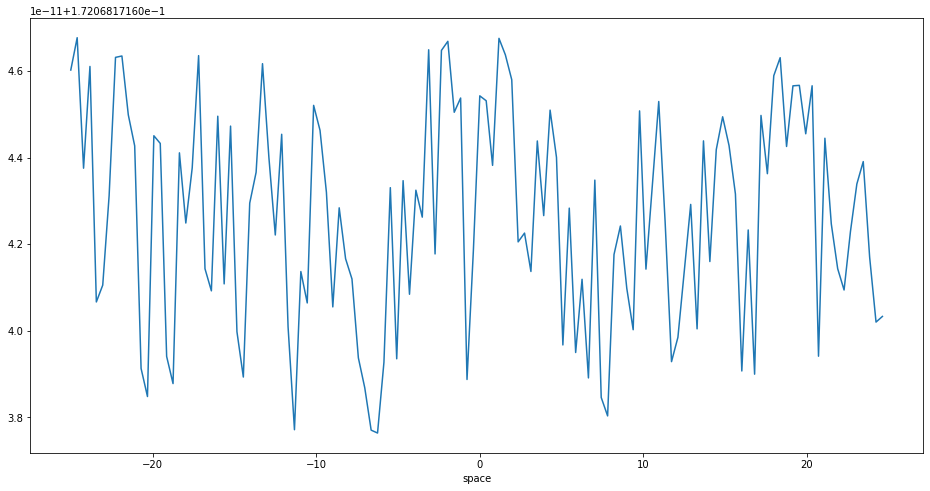

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
start = 10*1000
end = ps.end_t*10
space = np.fft.fftshift(ps.x)
space = np.roll(space, -1)[::-1]

array = ueff[20000] #sorted(ueff[20000])

#for array in ueff[10000]:#,int(start):int(end)]:
#    plt.plot(space, array)
    
ax.plot(space, array)
plt.xlabel('space')
array

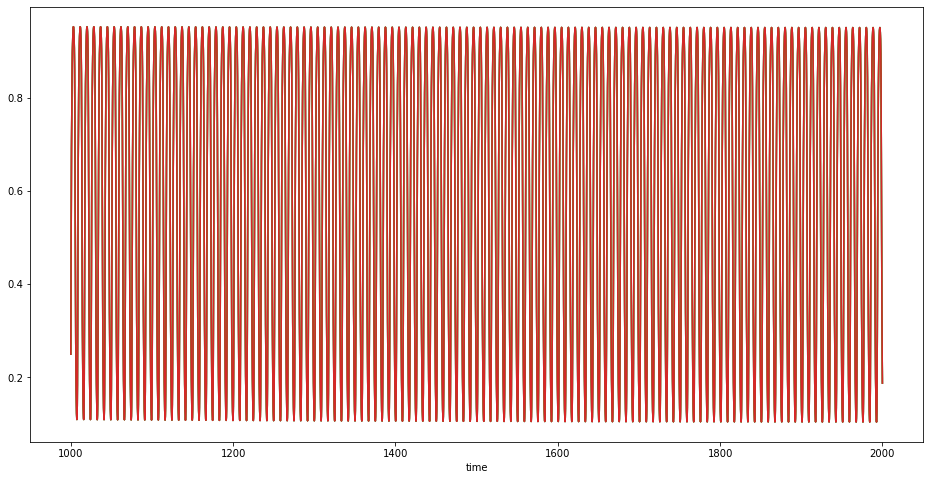

In [47]:
plt.figure(figsize=(16,8))
start = 10*1000
end = ps.end_t
time = ps.time[start:end]

for array in ueff.T[np.array([21,40,61,90]),int(start):int(end)]:
    plt.plot(time, array)
    plt.xlabel('time')

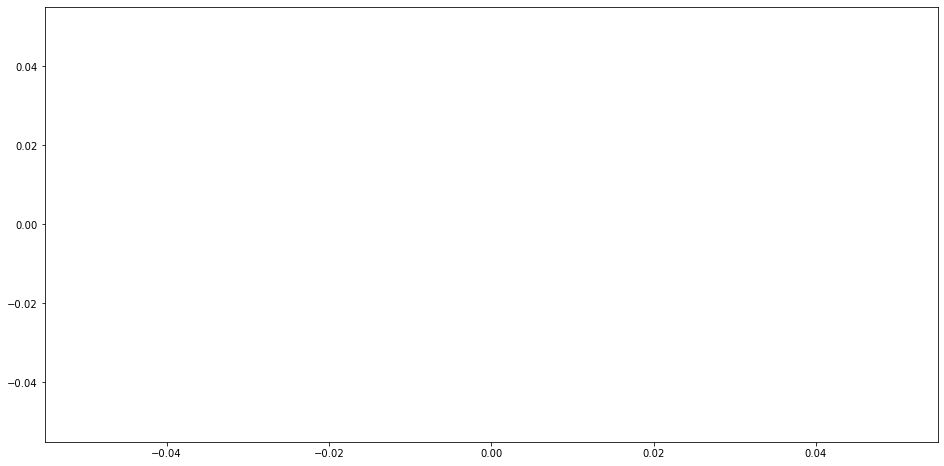

In [31]:
plt.figure(figsize=(16,8))
start = 45*1000
end = ps.end_t
time = ps.time[start:end]

#for array in ueff.T[np.array([21,40,61]),int(start):int(end)]:
#    plt.plot(time, array)
    
uearr = ueff.T[41,int(start):int(end)]
uiarr = uiff.T[41,int(start):int(end)]
plt.plot(uiarr, uearr)

In [32]:
from py.funcs import getPosition

for i in [0,22,45,61,90, 124, 150, 178, 194, 244, 250]:
    print('node %i at position %f' %(i, getPosition(i, ps)))

node 0 at position -0.000000
node 22 at position -8.593750
node 45 at position -17.578125
node 61 at position -23.828125
node 90 at position 14.843750
node 124 at position 1.562500


IndexError: index 150 is out of bounds for axis 0 with size 128

In [13]:
from py. explo import collectPatterns

1d Model initialised.


In [14]:
pattern = collectPatterns(fp, ps, last_sec=100)
pattern

4

In [157]:
ueff.T[:,-40:][:,33]

array([0.06030041, 0.05964167, 0.05893722, 0.05820338, 0.05745562,
       0.05670798, 0.05597277, 0.05526041, 0.05457945, 0.05393685,
       0.05333822, 0.05278832, 0.05229161, 0.05185292, 0.05147819,
       0.05117538, 0.05095535, 0.05083298, 0.05082821, 0.05096723,
       0.05128364, 0.0518196 , 0.0526269 , 0.05376796, 0.0553166 ,
       0.05735879, 0.05999309, 0.06333114, 0.06749794, 0.07263213,
       0.07888601, 0.08642531, 0.09542804, 0.10608196, 0.11857927,
       0.13310596, 0.14982008, 0.16880763, 0.18999818, 0.21302357,
       0.23703301, 0.26055011, 0.28152962, 0.29771823, 0.30720034,
       0.30884448, 0.30249213, 0.28894962, 0.26984191, 0.24728083,
       0.2233802 , 0.19983166, 0.17773517, 0.15767106, 0.13986835,
       0.12435243, 0.11103754, 0.09977684, 0.0903908 , 0.08268593,
       0.07646889, 0.07155667, 0.06778343, 0.06500413, 0.0630959 ,
       0.06195761, 0.06150844, 0.06168585, 0.06244303, 0.06374606,
       0.06557052, 0.06789735, 0.07070746, 0.07397503, 0.07765

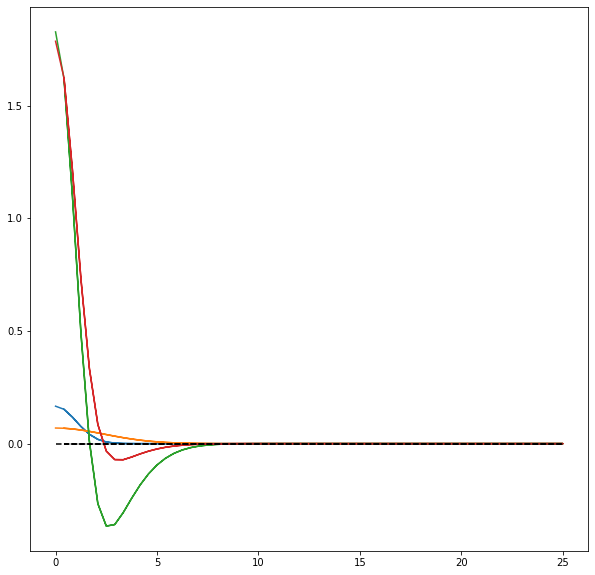

In [57]:
plt.figure(figsize=(10,10))
together_e = ps.w_ee*ps.ke - ps.w_ei*ps.ki
together_i = ps.w_ie*ps.ke - ps.w_ii*ps.ki
zero_line = np.zeros(ps.n)
plt.plot(ps.x, ps.ke, ps.x, ps.ki)
plt.plot(ps.x, together_e)
plt.plot(ps.x, together_i)
plt.plot(ps.x, zero_line, linestyle='dashed', c='black')

# Same setting, different length

In [68]:
params1 = {'I_e': 5.2 , 'I_i': 3.7, 'n': 350, 'length': 20, 'end_t': 500} 
ps1 = setParams(params1)
fps1 = computeFPs(ps1)
stab1 = checkFixPtsStability(fps1, ps1)
print('fixed points %s ' %str(fps1))
print('with (mass) stability %s'  %str(stab1))

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499
Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499
fixed points [array([0.15193985, 0.36254204]), array([0.83774719, 0.99686619]), array([0.9798589 , 0.99942469])] 
with (mass) stability [1, 0, 1]


In [69]:
fp1 = fps1[0]

In [70]:
ue1, ui1 = c1d.run(params1, itype='inte_approxi', fp=fp1)

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499


In [71]:
ueff1, uiff1 = c1d.run(params1, itype='inte_fft', fp=fp1)

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499


Text(0.5, 1.0, 'integration by fft')

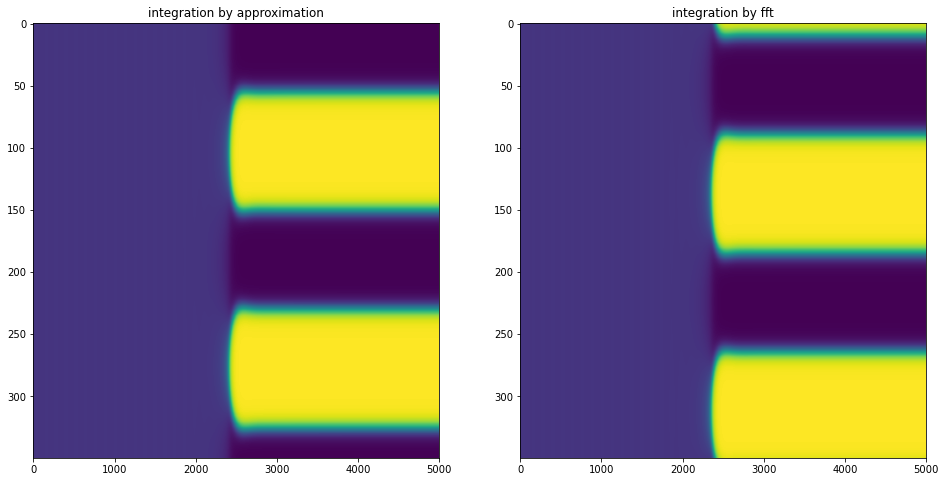

In [72]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue1.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff1.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [14]:
ue1[-10][0:5], ueff1[-10][0:5]

(array([0.95772056, 0.96679761, 0.97374202, 0.97906705, 0.98316525]),
 array([0.99875221, 0.99875361, 0.99875242, 0.99874861, 0.99874208]))

# Other setting (unstable)

In [15]:
params2 = {'I_e': 2.5, 'I_i': 1.6, 'n': 162, 'length': 10} 
ps2 = setParams(params2)
fps2 = computeFPs(ps2)
stab2 = checkFixPtsStability(fps2, ps2)
print('fixed points %s ' %str(fps2))
print('with (mass) stability %s'  %str(stab2))

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608
Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608
fixed points [array([0.19052787, 0.16625248])] 
with (mass) stability [0]


In [16]:
fp2 = fps2[0]

In [17]:
ue2, ui2 = c1d.run(params2, itype='inte_approxi')#, fp=fp2)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608


In [18]:
ueff2, uiff2 = c1d.run(params2, itype='inte_fft')#, fp=fp2)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608


Text(0.5, 1.0, 'integration by fft')

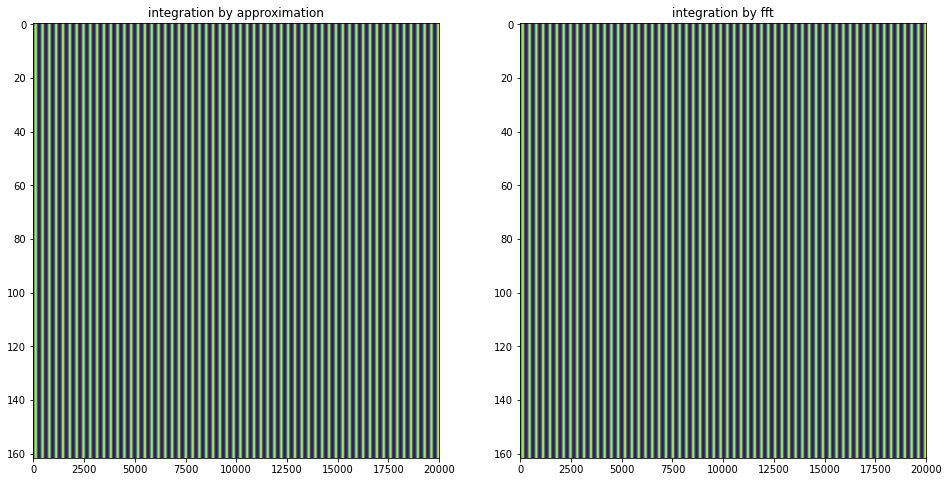

In [19]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue2.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff2.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [20]:
ue2

array([[0.00165198, 0.00351664, 0.00557534, ..., 0.00930578, 0.00682943,
        0.00304218],
       [0.00471953, 0.00650946, 0.00848557, ..., 0.01206705, 0.00968989,
        0.00605419],
       [0.00777636, 0.00949454, 0.01139136, ..., 0.01482983, 0.0125479 ,
        0.00905768],
       ...,
       [0.90915046, 0.90915046, 0.90915046, ..., 0.90915046, 0.90915046,
        0.90915046],
       [0.90681107, 0.90681107, 0.90681107, ..., 0.90681107, 0.90681107,
        0.90681107],
       [0.90430707, 0.90430707, 0.90430707, ..., 0.90430707, 0.90430707,
        0.90430707]])

# Harris PhD Setting (as close as possible at least)

In [115]:
params_h={'tau_e': 1, 'tau_i': 0.1,
        'w_ee': 1, 'w_ei': 1.5, 'w_ie': 1, 'w_ii': 0.25,
        'sigma_e': 1, 'sigma_i': 3, 'kernel': 'gaussian', 
        'mu_e': 0, 'mu_i': 0, 'beta_e': 50, 'beta_i': 50,
        'I_e': -0.1, 'I_i': -0.4,
        'dt': 0.1, 'start_t': 0, 'end_t': 500, 
        'n': 812, 'length': 60}

In [116]:
ps_h = setParams(params_h)
fps_h = computeFPs(ps_h)
stab_h = checkFixPtsStability(fps_h, ps)
print('fixed points %s ' %str(fps_h))
print('with (mass) stability %s'  %str(stab_h))

fixed points [[1.23241817e-02 3.81703853e-09]
 [3.14558007e-02 9.93427119e-09]
 [4.31367027e-01 2.24595030e-01]] 
with (mass) stability [1, 0, 1]


In [117]:
fp_h = fps_h[2]

In [118]:
ue_harris, ui_harris = c1d.run(params_h, itype='inte_approxi', fp=fp_h)

In [119]:
ueff_harris, uiff_harris = c1d.run(params_h, itype='inte_fft', fp=fp_h)

Text(0.5, 1.0, 'harris: integration by fft')

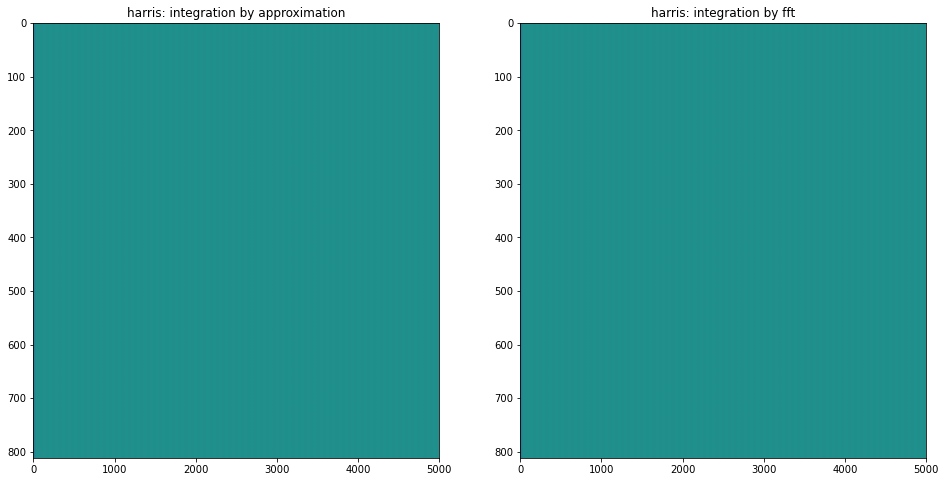

In [121]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue_harris.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff_harris.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='harris: integration by approximation')
ax1.set_title(label='harris: integration by fft')

In [113]:
ue_harris.T[10]

array([0.43136703, 0.43136703, 0.43136703, ..., 0.52631578, 0.47368421,
       0.52631578])